In [1]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import locale
locale.setlocale(locale.LC_ALL, 'pt_BR.utf8')

'pt_BR.utf8'

In [13]:
# Dias de permanência por hospital

df_Hosp = pd.read_excel(r'https://github.com/edufurlani/DoencasRespiratorias/raw/main/Data/DiasPermEstabSaude.xlsx')
df_Hosp = df_Hosp.iloc[:, :-1]
#df_Hosp.columns

df_Hosp.head()

,Mês/ano de competência,2077531 A C CAMARGO CANCER CENTER,2077655 ASSOC AACD V CLEMENTINO,2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER,2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES,3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO,2080575 HOSP BENEF PORTUGUESA,2078015 HOSP CLINICAS - HC DA FMUSP,2075962 HOSP DA STA CASA DE STO AMARO,2077469 HOSP DOM ALVARENGA,...,2082624 HOSPITAL JAPONES SANTA CRUZ,2077507 HOSPITAL LEFORTE - LIBERDADE,2076896 HOSPITAL SAO LUIZ GONZAGA,6891411 IBCC UNIDADE JACANA,2077590 INST BRAS. CONTROLE CANCER-IBCC,2091550 INST CEMA DE OFTALMO E OTORRINO,6123740 INST DO CANCER DO ESTADO DE SAO PAULO,2071568 INST DO CORACAO - INCOR - HC/FMUSP,2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,2688689 SANTA CASA DE SAO PAULO
0,jan/08,10,0,0,0,0,114,0,347,0,...,0,44,3,0,0,4,0,363,20,508
1,fev/08,52,0,8,0,0,475,1546,269,83,...,0,76,557,0,1,7,0,756,7,1711
2,mar/08,31,0,20,0,0,627,2704,455,121,...,0,134,470,0,15,3,0,560,81,2053
3,abr/08,20,0,0,0,0,656,4181,502,192,...,0,44,642,0,20,7,0,577,46,1635
4,mai/08,112,0,20,0,0,236,2756,449,432,...,0,130,913,0,7,6,0,947,37,2316


In [14]:
# Quebrando a coluna de data

df_Hosp['Mês/ano de competência'] = pd.to_datetime(df_Hosp['Mês/ano de competência'], format='%b/%y')

# Dividindo por ano/mes/dia
df_Hosp['Ano'] = df_Hosp['Mês/ano de competência'].dt.year
df_Hosp['Mês'] = df_Hosp['Mês/ano de competência'].dt.month

df_Hosp.drop('Mês/ano de competência',axis=1, inplace=True)

df_Hosp.head(5)

,2077531 A C CAMARGO CANCER CENTER,2077655 ASSOC AACD V CLEMENTINO,2078287 CENTRO DE REFERENCIA DA SAUDE DA MULHER,2077957 CENTRO DE REFERENCIA E TREINAMENTO DSTAIDS SES,3001466 CENTRO HOSPITALAR DO SISTEMA PENITENCIARIO,2080575 HOSP BENEF PORTUGUESA,2078015 HOSP CLINICAS - HC DA FMUSP,2075962 HOSP DA STA CASA DE STO AMARO,2077469 HOSP DOM ALVARENGA,2028840 HOSP EST - INSTITUTO DE INFECTOLOGIA EMILIO RIBAS,...,2076896 HOSPITAL SAO LUIZ GONZAGA,6891411 IBCC UNIDADE JACANA,2077590 INST BRAS. CONTROLE CANCER-IBCC,2091550 INST CEMA DE OFTALMO E OTORRINO,6123740 INST DO CANCER DO ESTADO DE SAO PAULO,2071568 INST DO CORACAO - INCOR - HC/FMUSP,2080125 INSTITUTO DO CANCER ARNALDO VIEIRA DE CARVALHO,2688689 SANTA CASA DE SAO PAULO,Ano,Mês
0,10,0,0,0,0,114,0,347,0,146,...,3,0,0,4,0,363,20,508,2008,1
1,52,0,8,0,0,475,1546,269,83,40,...,557,0,1,7,0,756,7,1711,2008,2
2,31,0,20,0,0,627,2704,455,121,162,...,470,0,15,3,0,560,81,2053,2008,3
3,20,0,0,0,0,656,4181,502,192,0,...,642,0,20,7,0,577,46,1635,2008,4
4,112,0,20,0,0,236,2756,449,432,211,...,913,0,7,6,0,947,37,2316,2008,5


In [15]:
# Agrupando todas as colunas em uma

df_serie_hist  = df_Hosp.melt(id_vars=['Ano', 'Mês'], var_name='Hospital', value_name='Internações')

# Buscando o máximo de internações que cada hospital teve na série histórica

max_internacoes_por_hospital = df_serie_hist.groupby('Hospital')['Internações'].max()

# Adicionando uma coluna para o máximo de internações na série histórica

df_serie_hist['Lotação Máxima'] = df_serie_hist['Hospital'].map(max_internacoes_por_hospital)

# Adicionando uma coluna com a porcentagem de ocupação

df_serie_hist['Ocupação'] = (df_serie_hist['Internações'] / df_serie_hist['Lotação Máxima'])*100

# Filtro

#df_serie_hist.loc[df_serie_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_serie_hist.to_csv("serie_hist.csv", index=False)
df_serie_hist.head(12)


,Ano,Mês,Hospital,Internações,Lotação Máxima,Ocupação
0,2008,1,2077531 A C CAMARGO CANCER CENTER,10,413,2.421308
1,2008,2,2077531 A C CAMARGO CANCER CENTER,52,413,12.590799
2,2008,3,2077531 A C CAMARGO CANCER CENTER,31,413,7.506053
3,2008,4,2077531 A C CAMARGO CANCER CENTER,20,413,4.842615
4,2008,5,2077531 A C CAMARGO CANCER CENTER,112,413,27.118644
5,2008,6,2077531 A C CAMARGO CANCER CENTER,30,413,7.263923
6,2008,7,2077531 A C CAMARGO CANCER CENTER,89,413,21.549637
7,2008,8,2077531 A C CAMARGO CANCER CENTER,54,413,13.075061
8,2008,9,2077531 A C CAMARGO CANCER CENTER,150,413,36.319613
9,2008,10,2077531 A C CAMARGO CANCER CENTER,172,413,41.646489


In [16]:
# Salvando as colunas Hospital e Lotação Máxima do dataframe df_serie_hist

ocupacao = df_serie_hist[['Hospital', 'Lotação Máxima']]

# Descobrindo a média de internações para cada mês e hospital, com base na série histórica

df_media_hist = df_serie_hist.groupby(['Hospital', 'Mês'])['Internações'].mean().astype(int).reset_index()

# Adicionando as colunas salvas anteriormente

df_media_hist = df_media_hist.merge(ocupacao, on=['Hospital'])

# Calculando a taxa de ocupação

df_media_hist['taxa_ocupacao'] = (df_media_hist['Internações'] / df_media_hist['Lotação Máxima'])*100

# Dropando as linhas duplicadas

df_media_hist.drop_duplicates(inplace=True)

# Filtro

#df_media_hist.loc[df_media_hist['Hospital'] == 'Nome do hospital']

# Vizualização
df_media_hist.head()

,Hospital,Mês,Internações,Lotação Máxima,taxa_ocupacao
0,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,1,83,1800,4.611111
187,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,2,111,1800,6.166667
374,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,3,112,1800,6.222222
561,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,4,66,1800,3.666667
748,0102075 HOSP MUN DA BELA VISTA - SANTA DULCE D...,5,88,1800,4.888889


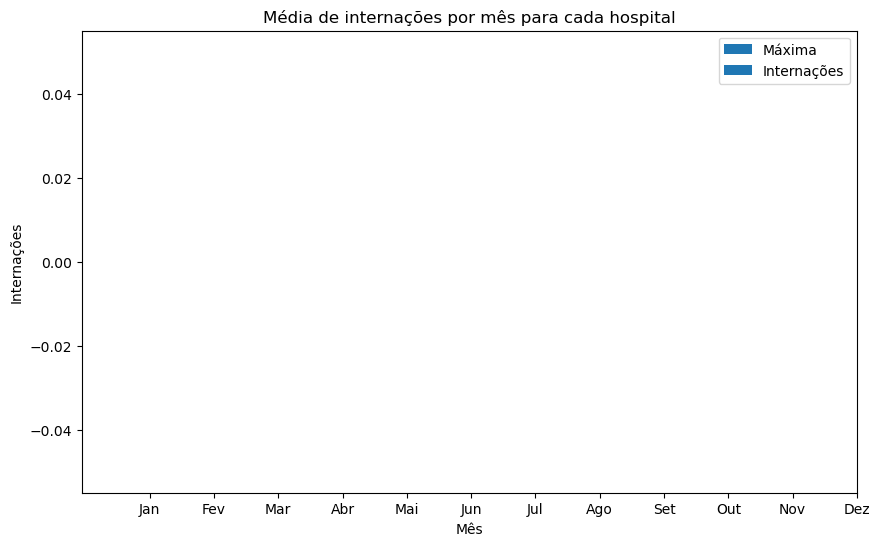

In [17]:
# Criar uma figura e eixos
plt.figure(figsize=(10, 6))

# Iterar sobre cada hospital
hospital = input('Nome do hospital')
# Filtrar os dados apenas para o hospital atual
data_hospital = df_media_hist[df_media_hist['Hospital'] == hospital]

# Plotar os dados de internações para cada mês para o hospital atual

plt.bar(data_hospital['Mês'], data_hospital['Lotação Máxima'], label='Máxima')
plt.bar(data_hospital['Mês'], data_hospital['Internações'], label='Internações')

# Adicionar os valores das internações dentro das barras
for index, row in data_hospital.iterrows():
    plt.text(row['Mês'], row['Internações'] + 5, str(row['Internações']), ha='center', va='bottom')

# Adicionar rótulos e título
plt.xlabel('Mês')
plt.ylabel('Internações')
plt.title('Média de internações por mês - {hospital}')
plt.legend()

# Definir os ticks do eixo x para mostrar os meses
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

# Mostrar o gráfico
#plt.grid(True)
plt.show()

In [19]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_squared_error

In [20]:
# Função para preparar a visão de internações por mês/ano de um hospital específico
def prepare_time_series_for_hospital(data, hospital_name):
    # Filtrar o dataframe pelo hospital desejado
    data_hospital = data[data['Hospital'].str.contains(hospital_name, na=False, case=False)]

    # Se não encontrar o hospital, retorne None
    if data_hospital.empty:
        print(f"Hospital '{hospital_name}' não encontrado.")
        return None

    # Transformando o índice
    data_hospital.set_index(['Ano', 'Mês'], inplace=True)
    data_hospital.sort_index(inplace=True)

    # Selecionar a coluna de internações
    data_hospital = data_hospital['Internações']

    # Definir uma frequência mensal para o índice
    data_hospital.index = pd.date_range(start=f"{data_hospital.index[0][0]}-{data_hospital.index[0][1]}", periods=len(data_hospital), freq='M')

    return data_hospital

# Função de previsão usando SARIMAX com auto_arima
def forecast_time_series(data, steps=12):
    # Use auto_arima para encontrar os melhores hiperparâmetros do modelo SARIMA
    model = auto_arima(data, seasonal=True, m=12, stepwise=True, trace=True, error_action='ignore',
                      suppress_warnings=True, max_order=None)

    # Ajustar o modelo SARIMAX com os hiperparâmetros encontrados
    sarimax_model = SARIMAX(data, order=model.order, seasonal_order=model.seasonal_order)
    fitted_model = sarimax_model.fit(disp=False)

    # Fazer previsões
    forecast = fitted_model.get_forecast(steps=steps)
    forecast_index = pd.date_range(data.index[-1] + DateOffset(months=1), periods=steps, freq='M')
    forecast_values = forecast.predicted_mean
    forecast_conf_int = forecast.conf_int()

    # Construir dataframe de previsão
    forecast_df = pd.DataFrame({
        'Forecast': forecast_values,
        'Lower CI': forecast_conf_int.iloc[:, 0],
        'Upper CI': forecast_conf_int.iloc[:, 1]
    }, index=forecast_index)

    return forecast_df

# Função de previsão usando Prophet
def forecast_time_series_prophet(data):
    # Preparar o dataframe para o Prophet
    data_prophet = pd.DataFrame({
        'ds': data.index,
        'y': data.values
    })

    # Ajustar o modelo Prophet
    prophet_model = Prophet()
    prophet_model.fit(data_prophet)

    # Fazer previsões
    future = prophet_model.make_future_dataframe(periods=12, freq='M')
    forecast = prophet_model.predict(future)

    return forecast.set_index('ds')['yhat']

# Função para calcular o MSE
def calculate_mse(actual, predicted):
    return mean_squared_error(actual, predicted)

# Carregar o arquivo CSV
data = df_serie_hist

# Obter os nomes únicos dos hospitais
hospital_names = data['Hospital'].unique()

# Criar um DataFrame vazio para armazenar as previsões
forecast_df = pd.DataFrame()

# Iterar sobre os nomes dos hospitais e fazer previsões para cada um
for hospital_name in hospital_names:
    print(f"Previsão para o hospital '{hospital_name}':")
    # Preparar a série temporal para o hospital específico
    hospital_time_series = prepare_time_series_for_hospital(data, hospital_name)

    # Se hospital_time_series não for None, faça a previsão
    if hospital_time_series is not None:
        # Previsão com SARIMAX
        hospital_forecast_sarimax = forecast_time_series(hospital_time_series)
        # Previsão com Prophet
        hospital_forecast_prophet = forecast_time_series_prophet(hospital_time_series)

        # Calcular o MSE para cada previsão
        mse_sarimax = calculate_mse(hospital_time_series[-12:], hospital_forecast_sarimax['Forecast'])
        mse_prophet = calculate_mse(hospital_time_series[-12:], hospital_forecast_prophet[-12:])

        # Imprimir os MSEs
        print(f"MSE do modelo SARIMAX: {mse_sarimax}")
        print(f"MSE do modelo Prophet: {mse_prophet}")

        # Comparar os MSEs e escolher o melhor modelo
        if mse_sarimax < mse_prophet:
            print("O modelo SARIMAX é o melhor para este hospital.")
            best_forecast = hospital_forecast_sarimax['Forecast']
        else:
            print("O modelo Prophet é o melhor para este hospital.")
            best_forecast = hospital_forecast_prophet[-12:]

        # Adicionar as previsões do melhor modelo ao DataFrame de previsões
        forecast_df[hospital_name] = best_forecast

        # Plotar as previsões
        plt.figure(figsize=(10, 6))
        plt.plot(hospital_time_series, label='Dados originais')
        plt.plot(hospital_forecast_sarimax['Forecast'], label=f'Previsão SARIMAX (MSE: {mse_sarimax:.2f})')
        plt.plot(hospital_forecast_prophet[-12:], label=f'Previsão Prophet (MSE: {mse_prophet:.2f})')
        plt.legend()
        plt.title(f"Previsões para o hospital '{hospital_name}'")
        plt.show()

# Imprimir o DataFrame de previsões
print(forecast_df)

Previsão para o hospital '2077531 A C CAMARGO CANCER CENTER':
Performing stepwise search to minimize aic


C:\Users\DuduCuco\AppData\Local\Temp\ipykernel_7564\2245924110.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hospital.sort_index(inplace=True)


 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=2087.895, Time=0.82 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2150.691, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2117.224, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2088.480, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2148.691, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=2089.307, Time=0.57 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=2089.321, Time=0.56 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=2088.930, Time=1.85 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=2089.156, Time=1.43 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=2087.469, Time=0.29 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=2086.063, Time=0.28 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=2087.921, Time=0.53 sec
 ARIMA(1,1,2)(0,0,1)[12] intercept   : AIC=2087.909, Time=0.52 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=2087.981, Time=0.14 sec


AttributeError: 'Prophet' object has no attribute 'stan_backend'